In [1]:
import scipy.io as sio    
import numpy as np
import pandas as pd
import glob,os
from matplotlib import pylab as plt
from RTest import Relief

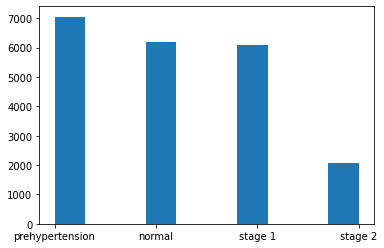

In [2]:
# load data
path = '/Users/lyuliangyi/Desktop/HKCOCHE/feature_selection/Feature_data'
file = glob.glob(os.path.join(path,'*.mat'))

label = []
for f in file:
    label.append(f[65:-4])
    
d={}
for i in range(len(file)):
    mat = sio.loadmat(file[i])
    d['mat_'+label[i]] = pd.DataFrame(mat['feature_person'],
                                     columns=['PTTf','PTTp','RI','ST','upTime','SV','DV','HR','SBP','DBP','MBP'])
    
# classification of bp
for l in label:
    df = d['mat_'+l]
    df['class'] = ''
    for i in range(len(df)):
        if df.loc[i,'SBP'] >= 160 or df.loc[i,'DBP'] >= 100: # stage 1 hypertension 
            df.loc[i,'class'] = 'stage 2' 
        elif df.loc[i,'SBP'] >= 140 or df.loc[i,'DBP'] >= 90: # stage 1 hypertension 
            df.loc[i,'class'] = 'stage 1'
        elif df.loc[i,'SBP'] >= 120 or df.loc[i,'DBP'] >= 90: # prehypertension
            df.loc[i,'class'] = 'prehypertension'
        else:
            df.loc[i,'class'] = 'normal'
    d['mat_'+l] = df

# random select 50% data
d1 = []
sample_rate = 0.1

for l in label:
    m, n = d['mat_'+l].shape
    df = d['mat_'+l].sample(n=int(m*sample_rate),random_state=2023)
    d1.append(df)
df_sample = pd.concat(d1)
df_sample = df_sample.reset_index(drop=True)
df_sample = df_sample[['PTTf','PTTp','RI','ST','upTime','SV','DV','HR','class']]

plt.hist(df_sample['class'])
plt.show()    

In [3]:
df_sample

,PTTf,PTTp,RI,ST,upTime,SV,DV,HR,class
0,44.0,31.0,0.306774,33.0,13.0,0.000111,-0.001547,0.012346,prehypertension
1,46.0,30.0,0.206664,35.0,16.0,0.002608,-0.001984,0.012195,prehypertension
2,45.0,31.0,0.352540,35.0,14.0,0.001660,-0.001041,0.011905,prehypertension
3,47.0,32.0,0.266668,33.0,15.0,0.003834,-0.003431,0.011364,normal
4,45.0,31.0,0.269937,34.0,14.0,0.000653,-0.001567,0.011765,prehypertension
...,...,...,...,...,...,...,...,...,...
21373,49.0,32.0,0.256799,37.0,17.0,0.004941,-0.003219,0.009346,stage 1
21374,45.0,29.0,0.343552,39.0,16.0,0.001324,-0.002219,0.009346,prehypertension
21375,45.0,30.0,0.344141,38.0,15.0,0.001919,-0.001785,0.010101,prehypertension
21376,45.0,31.0,0.293052,37.0,14.0,0.000589,-0.001844,0.010753,stage 1


In [4]:
f = Relief(df_sample, 1, 3)
f.reliefF()
w = f.get_final()
w

array([ 0.00000000e+00,  0.00000000e+00,  7.05607477e-03,  4.67289720e-05,
        9.34579439e-05,  5.93457944e-03,  1.23831776e-02, -9.34579439e-05])

In [7]:
features = ['PTTf','PTTp','RI','ST','upTime','SV','DV','HR']
df_weight = pd.DataFrame({'features': features,
                         'weights': w})
df_weight.sort_values(by=['weights'],ascending=False)

,features,weights
6,DV,0.012383
2,RI,0.007056
5,SV,0.005935
4,upTime,0.000093
3,ST,0.000047
0,PTTf,0.000000
1,PTTp,0.000000
7,HR,-0.000093
